# FFT transformation and power spectrum

## Importing modules

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Signal 1

### Signal definition

The signal is given by $S(t) = A_1 \sin(2\pi f_1 t) + A_2 \sin(2\pi f_2 t)$, with $|f_1 - f_2| << 1$. The signal is sampled for `max_time`, at `nr_samples` points.

In [2]:
ampl1 = 1.0
freq1 = 1.0/60.0
ampl2 = 2.0
freq2 = 1.1/60.0
max_time = 100.0*60
nr_samples = 10001

Compute the times $t$ at which the signal is sampled, and compute the signal $S(t)$ at these time points $t$.

In [3]:
time_vals = np.linspace(0.0, max_time, nr_samples)
signal_vals = np.sin(2.0*np.pi*freq1*time_vals) + 2.0*np.sin(2.0*np.pi*freq2*time_vals)

Plot the signal as a function of time.

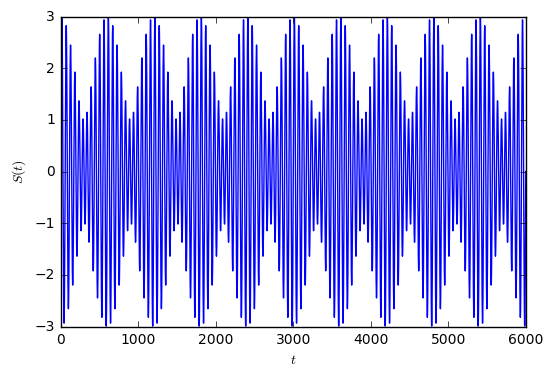

In [4]:
plt.plot(time_vals, signal_vals)
plt.xlabel(r'$t$')
plt.ylabel(r'$S(t)$');

### Signal analysis

Compute the frequency values $f$ at which the FFT will be calculated, and compute the FFT, and normalize the result to 1.

In [5]:
freq_vals = np.fft.fftfreq(len(time_vals), max_time/nr_samples)
fft_vals = np.fft.fft(signal_vals)
normed_fft_vals = np.abs(fft_vals)/np.max(np.abs(fft_vals))

Plot the real valued components of the FFT as a function of the coresponding frequencies.

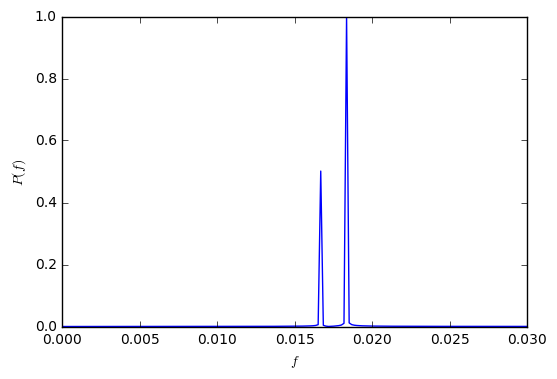

In [6]:
plt.plot(freq_vals[:len(freq_vals)//2], normed_fft_vals[:len(normed_fft_vals)//2])
plt.xlim(0.0, 0.03)
plt.xlabel(r'$f$')
plt.ylabel(r'$P(f)$');

Two maxima can be observed, each at the frequences $f_1$ and $f_2$ respectively.

## Signal 2

### Signal definition

The signal is given by $S(t) = A_1 \theta(T_s - t) \sin(2\pi f_1 t) + A_2 \theta(t - T_s) \sin(2\pi f_2 t)$, with $|f_1 - f_2| << 1$. The signal is sampled for `max_time`, at `nr_samples` points.  Here, $\theta(t)$ is the Heaviside function, and $T_s$ is the time at which the signal switches from the first to the second amplitude/frequency.  Note that this transition is non-continuous.

In [7]:
ampl1 = 1.0
freq1 = 1.0/60.0
ampl2 = 2.0
freq2 = 1.1/60.0
max_time = 100.0*60
switch_time = 50.3*60
nr_samples = 10001
switch_idx = int(nr_samples*(switch_time/max_time))

Compute the times $t$ at which the signal is sampled, and compute the signal $S(t)$ at these time points $t$.

In [8]:
time_vals = np.linspace(0.0, max_time, nr_samples)
signal1_vals = ampl1*np.sin(2.0*np.pi*freq1*time_vals[:switch_idx])
signal2_vals = ampl2*np.sin(2.0*np.pi*freq2*time_vals[switch_idx:])
signal_vals = np.concatenate([signal1_vals, signal2_vals], axis=0)

Plot the signal as a function of time.

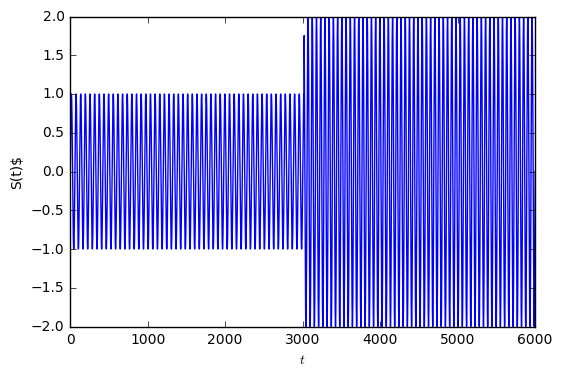

In [9]:
plt.plot(time_vals, signal_vals)
plt.xlabel(r'$t$')
plt.ylabel(r'S(t)$');

Zoooming in on the switch point frmo the first to the second signal shows the discontinuity in the signal.

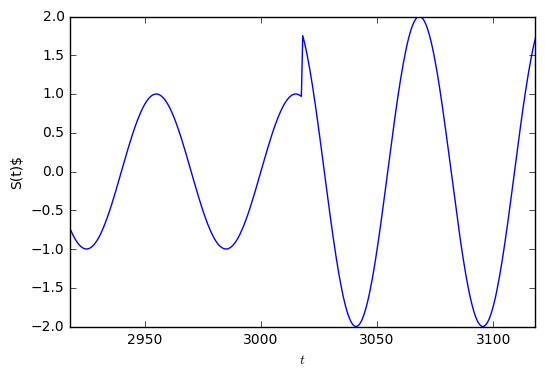

In [10]:
plt.plot(time_vals, signal_vals)
plt.xlim(switch_time - 100.0, switch_time + 100.0)
plt.xlabel(r'$t$')
plt.ylabel(r'S(t)$');

### Signal analysis

Compute the frequency values $f$ at which the FFT will be calculated, and compute the FFT, and normalize the result to 1.

In [11]:
freq_vals = np.fft.fftfreq(len(time_vals), max_time/nr_samples)
fft_vals = np.fft.fft(signal_vals)
normed_fft_vals = np.abs(fft_vals)/np.max(np.abs(fft_vals))

Plot the real valued components of the FFT as a function of the coresponding frequencies.

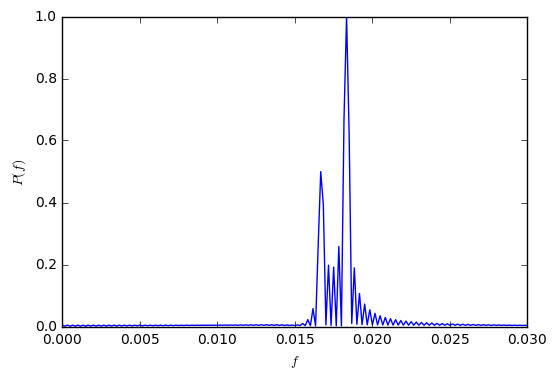

In [12]:
plt.plot(freq_vals[:len(freq_vals)//2], normed_fft_vals[:len(normed_fft_vals)//2])
plt.xlim(0.0, 0.03)
plt.xlabel(r'$f$')
plt.ylabel(r'$P(f)$');

Note that due to the discontinuity in the signal the original maxima at $f_1$ and $f_2$ are broadened, and additional peaks occur.

We make the signal periodic by mirroring it around the origin and copmute the FFT.

In [13]:
freq_vals = np.fft.fftfreq(2*len(time_vals) + 1, max_time/nr_samples)
symm_signal_vals = np.concatenate([signal_vals[::-1], np.array([signal_vals[0]]), signal_vals], axis=0)
fft_vals = np.fft.fft(symm_signal_vals)
normed_fft_vals = np.abs(fft_vals)/np.max(np.abs(fft_vals))

Plotting the resulting power specturm shows that the periodicity doesn't really make a difference.

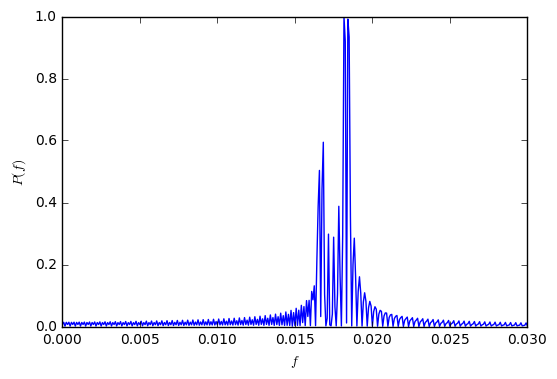

In [14]:
plt.plot(freq_vals[:len(freq_vals)//2], normed_fft_vals[:len(normed_fft_vals)//2])
plt.xlim(0.0, 0.03)
plt.xlabel(r'$f$')
plt.ylabel(r'$P(f)$');

## Signal 3

### Signal definition

The amplitude of the signal increases linearly in time frmo an initial value of $A_1$ to a final valule of $A_2$ and is given by $S(t) = (A_1 + (A_2 - A_1)\frac{t}{T_s}) \sin(2\pi f t)$.

In [15]:
ampl1 = 1.0
freq = 1.0/60.0
ampl2 = 5.0
max_time = 100.0*60
nr_samples = 10001

Compute the time points as well as the signal.

In [16]:
time_vals = np.linspace(0.0, max_time, nr_samples)
signal_vals = (ampl1 + (ampl2 - ampl1)*time_vals/max_time)*np.sin(2.0*np.pi*freq*time_vals)

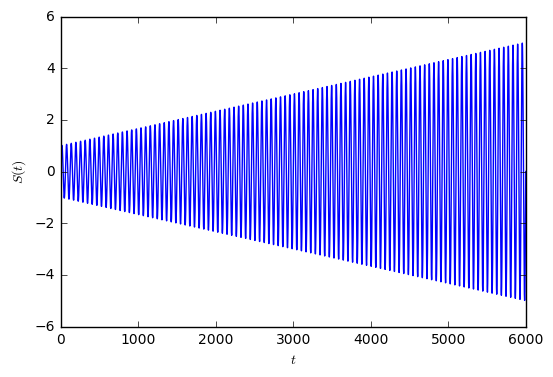

In [17]:
plt.plot(time_vals, signal_vals)
plt.xlabel(r'$t$')
plt.ylabel(r'$S(t)$');

### Signal analysis

Compute the frequency values $f$ at which the FFT will be calculated, and compute the FFT, and normalize the result to 1.

In [18]:
freq_vals = np.fft.fftfreq(len(time_vals), max_time/nr_samples)
fft_vals = np.fft.fft(signal_vals)
normed_fft_vals = np.abs(fft_vals)/np.max(np.abs(fft_vals))

Plotting the power spectrum shows that the peak we expect at $f$ is in fact smeared out due the the increasing amplitude.

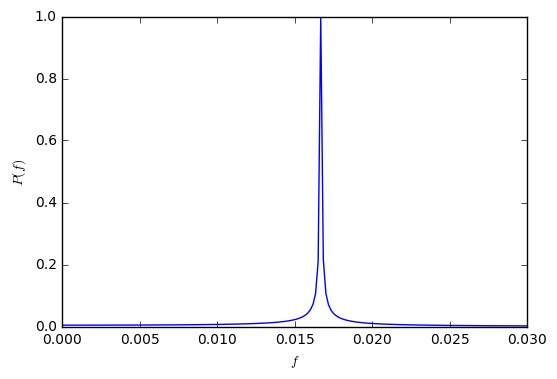

In [19]:
plt.plot(freq_vals[:len(freq_vals)//2], normed_fft_vals[:len(normed_fft_vals)//2])
plt.xlim(0.0, 0.03)
plt.xlabel(r'$f$')
plt.ylabel(r'$P(f)$');

## Signal 4

### Signal definition

The signal is periodic with constant amplitude, but an offset that increases linearly with time.  It is given by $S(t) = O (\frac{t}{T_s} - 1) + A \sin(2\pi f t)$.

In [25]:
ampl = 1.0
freq = 1.0/60.0
max_offset = 2.0
max_time = 100.0*60
nr_samples = 10001

Compute the time points as well as the signal.

In [26]:
time_vals = np.linspace(0.0, max_time, nr_samples)
signal_vals = max_offset*(time_vals/max_time - 1.0) + ampl*np.sin(2.0*np.pi*freq*time_vals)

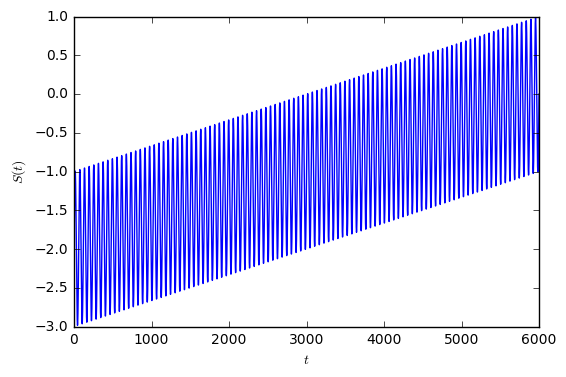

In [27]:
plt.plot(time_vals, signal_vals)
plt.xlabel(r'$t$')
plt.ylabel(r'$S(t)$');

### Signal analysis

Compute the frequency values $f$ at which the FFT will be calculated, and compute the FFT, and normalize the result to 1.

In [28]:
freq_vals = np.fft.fftfreq(len(time_vals), max_time/nr_samples)
fft_vals = np.fft.fft(signal_vals)
normed_fft_vals = np.abs(fft_vals)/np.max(np.abs(fft_vals))

Plotting the power spectrum shows that the peak we expect at $f$ is in fact smeared out due the the increasing amplitude.

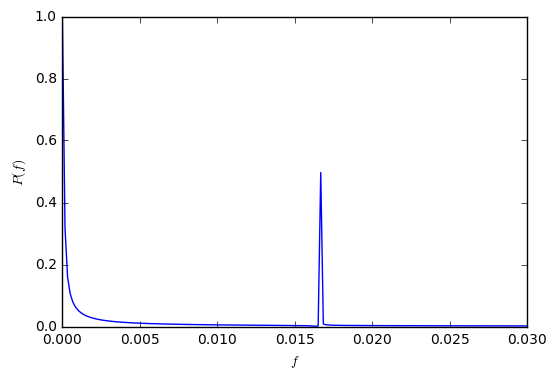

In [29]:
plt.plot(freq_vals[:len(freq_vals)//2], normed_fft_vals[:len(normed_fft_vals)//2])
plt.xlim(0.0, 0.03)
plt.xlabel(r'$f$')
plt.ylabel(r'$P(f)$');

## Signal 5

### Signal definition

The signal is random, it is geenrated as a 1-D random walk.

In [10]:
def create_random_signal(n, start=0.0, step=1.0, prob=0.5):
    signal = np.empty(n)
    signal[0] = start
    for i in range(1, n):
        if np.random.rand() < 0.5:
            signal[i] = signal[i - 1] + step
        else:
            signal[i] = signal[i - 1] - step
    return signal

The signal can be made periodic by construction as well.

In [26]:
def create_random_periodic_signal(n, start=0.0, step=1.0, prob=0.5):
    signal = np.empty(n//2)
    signal[0] = start
    for i in range(1, n//2):
        if np.random.rand() < 0.5:
            signal[i] = signal[i - 1] + step
        else:
            signal[i] = signal[i - 1] - step
    return np.concatenate((signal, np.array([signal[-1]]), signal[::-1]), axis=0)

Compute the time points as well as the signal.

In [27]:
start = 0.0
step = 1.0
prob = 0.5
max_time = 100.0*60
nr_samples = 10001

In [28]:
time_vals = np.linspace(0.0, max_time, nr_samples)
signal_vals = create_random_periodic_signal(nr_samples, start, step, prob)

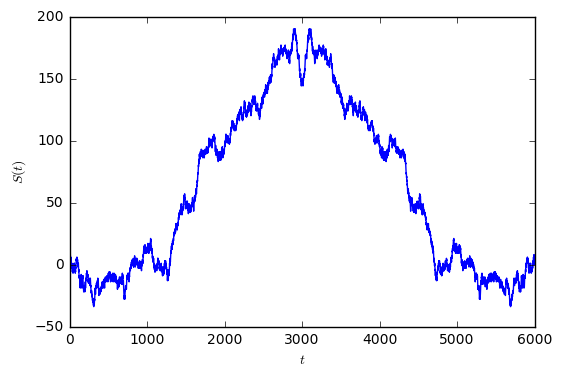

In [29]:
plt.plot(time_vals, signal_vals)
plt.xlabel(r'$t$')
plt.ylabel(r'$S(t)$');

### Signal analysis

Compute the frequency values $f$ at which the FFT will be calculated, and compute the FFT, and normalize the result to 1.

In [30]:
freq_vals = np.fft.fftfreq(len(time_vals), max_time/nr_samples)
fft_vals = np.fft.fft(signal_vals)
normed_fft_vals = np.abs(fft_vals)/np.max(np.abs(fft_vals))

Plotting the power spectrum shows no peaks at all, as is to be expected. Low frequencies dominate.

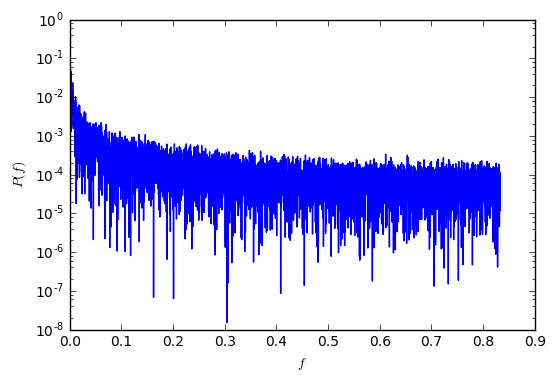

In [31]:
plt.semilogy(freq_vals[:len(freq_vals)//2], normed_fft_vals[:len(normed_fft_vals)//2])
plt.xlabel(r'$f$')
plt.ylabel(r'$P(f)$');

The following plot shows a detail of the power spectrum.

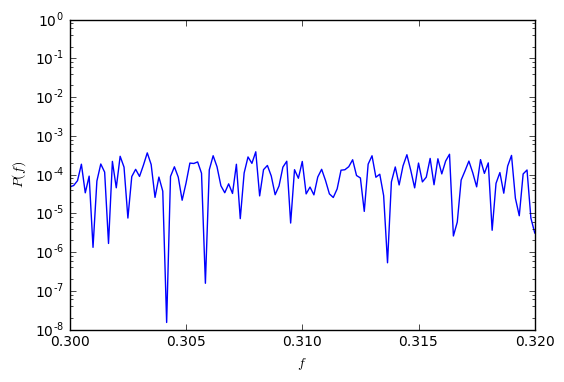

In [32]:
plt.semilogy(freq_vals[:len(freq_vals)//2], normed_fft_vals[:len(normed_fft_vals)//2])
plt.xlim(0.3, 0.32)
plt.xlabel(r'$f$')
plt.ylabel(r'$P(f)$');